## Implementation for Perceptron Model on Iris data-set

In [7]:
import numpy as np # version 2.3.3
import pandas as pd # version 2.3.2
import matplotlib.pyplot as plt # version 3.10.6
from matplotlib.colors import ListedColormap
import os
import warnings
warnings.filterwarnings("ignore")

In [8]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000, random_state=1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.random_state = random_state

    def fit(self, X, y):
        regen = np.random.RandomState(self.random_state)
        self.w_ = regen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []
        for _ in range(self.n_iterations):
            erros = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                erros += int(update != 0.0)
            self.errors_.append(erros)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


calling the data

In [9]:
s = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


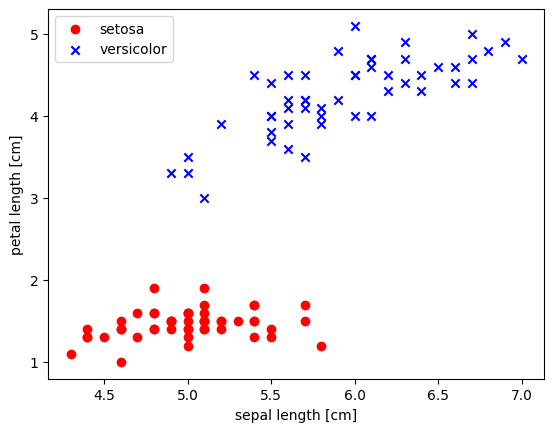

In [10]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)


X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

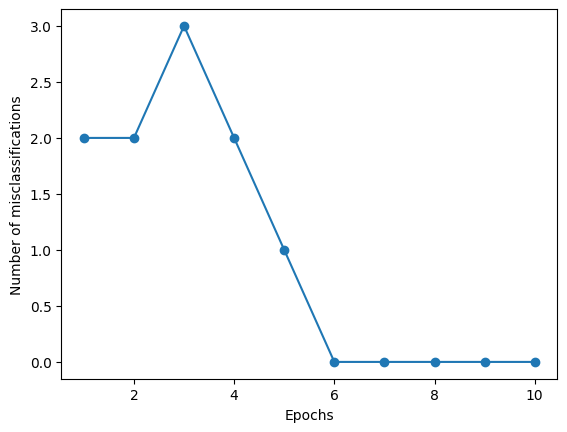

In [11]:
ppn = Perceptron(learning_rate=0.1, n_iterations=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [12]:
def plot_decision_regions(X, y, classifier, resloution=0.04):
    markers = ('s', 'x', '<', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resloution), 
                           np.arange(x2_min, x2_max, resloution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=colors[idx], marker=markers[idx]
                    , label=cl, edgecolors='black')

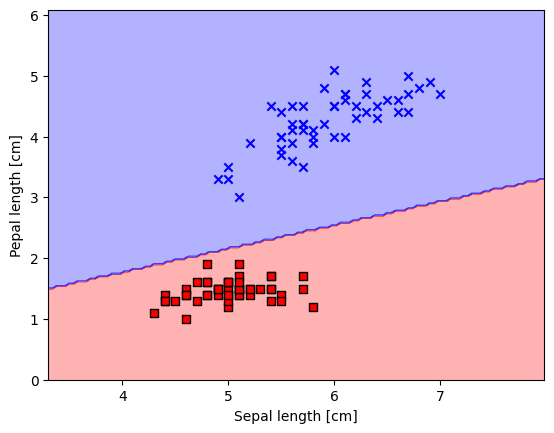

In [13]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Pepal length [cm]')
plt.show()

### Implementation For Adaline model with batch gradient descent algorithm on Iris data-set

In [14]:
class AdalineGD:
    def __init__(self,learning_rate=0.01, n_iterations=50, random_state=1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.random_state= random_state

    def fit(self,X,y):
        regen = np.random.RandomState(self.random_state)
        self.w_ = regen.normal(0,0.01,size=X.shape[1])
        self.losses_ = []
        self.b_ = np.float64(0.)
        for _ in range(self.n_iterations):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            error = (y - output)
            self.w_ += self.learning_rate * 2.0 * X.T.dot(error) / X.shape[0]
            self.b_ += self.learning_rate * 2.0 * error.mean()
            loss = (error**2).mean()
            self.losses_.append(loss)
        return self


    def net_input(self,X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self,X):
        return X
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

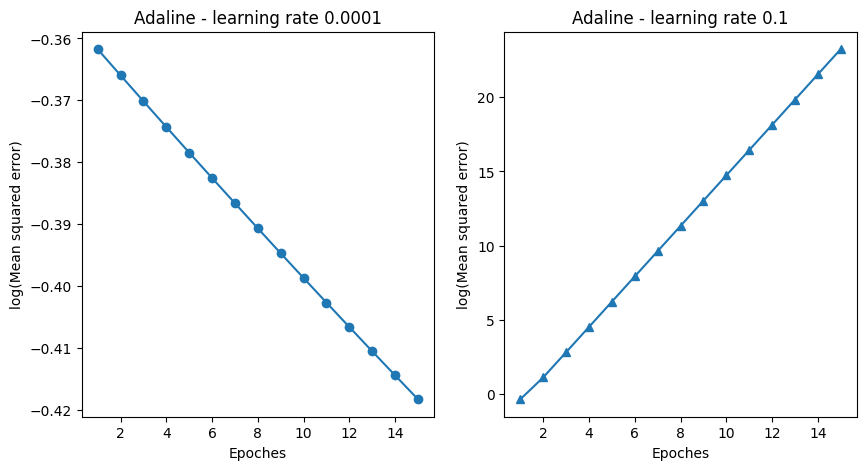

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ada1 = AdalineGD(learning_rate=0.0001, n_iterations=15,).fit(X,y) # X y from the iris data-set
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epoches')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - learning rate 0.0001')
ada2 = AdalineGD(learning_rate=0.1, n_iterations=15).fit(X,y)
ax[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker='^')
ax[1].set_xlabel('Epoches')
ax[1].set_ylabel('log(Mean squared error)')
ax[1].set_title('Adaline - learning rate 0.1')
plt.show()

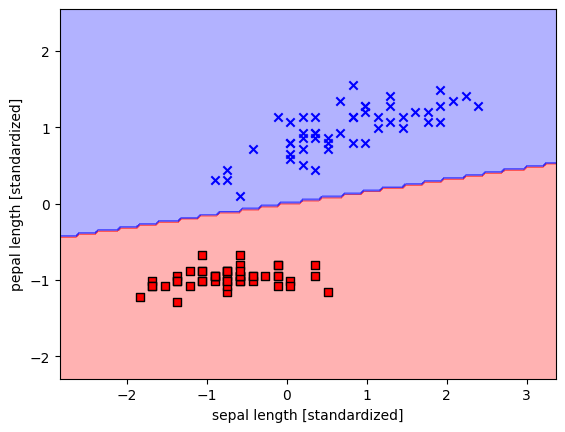

In [16]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada_std = AdalineGD(learning_rate=0.5,n_iterations=20)
ada_std.fit(X_std,y)
plot_decision_regions(X_std,y, classifier=ada_std)
plt.xlabel("sepal length [standardized]")
plt.ylabel("pepal length [standardized]")
plt.show()

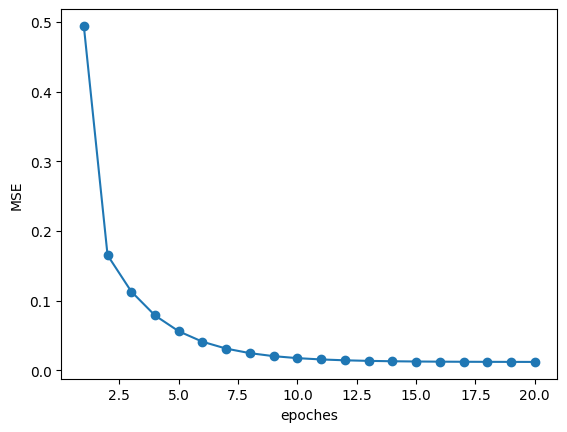

In [17]:
plt.plot(range(1, len(ada_std.losses_) + 1), ada_std.losses_ ,marker='o')
plt.xlabel("epoches")
plt.ylabel("MSE")
plt.show()

### Implementation of AdalineSGD (Stochastic gradient descent) on Iris data-set

In [18]:
class AdalineSGD:
    # parameters:
    #     learning_rate: (float)
    #         learning rate variable of the model should be between 0.0 to 1.0
    #     n_itera: (int)
    #         epoches or iterations the model will do in the data
    #     Shuffle: (bool)
    #         it indicates if the data are shuffled to prevent cycles on data.
    #     random_state: (bool)
    #         it indicates weither the data are randomly distributed or not

    def __init__(self,learning_rate=0.01 , n_itera=50,shuffle=True ,random_state=True):
        self.learning_rate = learning_rate
        self.n_itera = n_itera
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_init = False # wight initializtion
    
    def fit(self,X,y):
        self.wight_initialized(X.shape[1])
        self.losses_ = []
        for _ in range(self.n_itera):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            losses = []
            for feature, target in zip(X,y):
                losses.append(self._update_wights(feature, target))
            avg_mean = np.mean(losses)
            self.losses_.append(avg_mean)
        return self


    def partial_fit(self,X,y):
        if not self.w_:
            self.wight_initialized(X.shape[1])
        if y.ravel().shape[0] > 1:
            for feature, target in zip (X,y):
                self._update_wights(feature,target)
        else:
            self._update_wights(X,y)
        return self


    def _shuffle(self,X,y):
        r = self.regen.permutation(len(y))
        return X[r], y[r]
        


    def wight_initialized(self,m):
        self.regen = np.random.RandomState(self.random_state)
        self.w_ = self.regen.normal(0,0.01,size=m)
        self.b_ = np.float64(0.)
        self.w_init = True

    def _update_wights(self, X, y):
        output = self.activation(self.net_input(X))
        error = (y - output)
        self.w_ += self.learning_rate * 2.0 * error * X
        self.b_ += self.learning_rate * 2.0 * error
        loss = error**2
        return loss



    def net_input(self,X):
        return np.dot(X, self.w_) + self.b_

    def activation(self,X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.5,1,0)


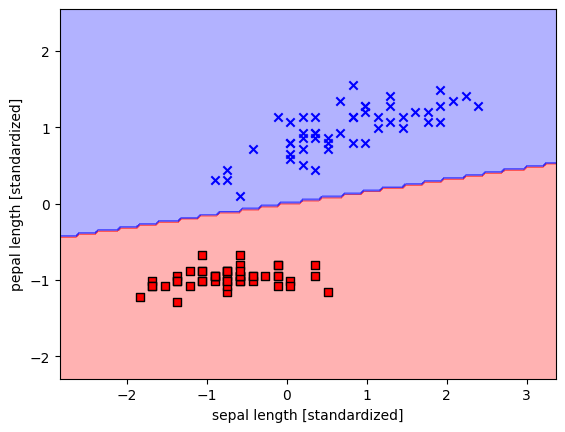

In [19]:
ada_sgd = AdalineSGD(learning_rate=0.01,n_itera=15)
ada_sgd.fit(X_std,y)
plot_decision_regions(X_std,y, classifier=ada_std)
plt.xlabel("sepal length [standardized]")
plt.ylabel("pepal length [standardized]")
plt.show()

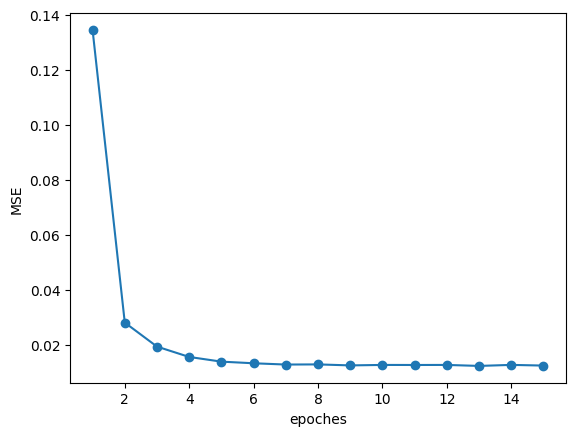

In [20]:
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_ ,marker='o')
plt.xlabel("epoches")
plt.ylabel("MSE")
plt.show()

### We will now use perceptron via scikit-learn

In [21]:
from sklearn import datasets # version  1.7.2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
sn = datasets.load_iris()
X = sn.data[:, [2,3]]
y = sn.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)

scalar = StandardScaler()
scalar.fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print("Misclassification: %d" % (y_test != y_pred).sum())

print("Accuracy of the model:", ppn.score(X_test_std, y_test))

Misclassification: 1
Accuracy of the model: 0.9777777777777777
